In [3]:
import pandas as pd
import numpy as np

In [3]:
kolom = {'col1' : [2, 9, 19],
        'col2' : [5, np.nan, 17],
        'col3' : [3, 9, np.nan],
        'col4' : [6, 0, 9],
        'col5' : [np.nan, 7, np.nan]}

data = pd.DataFrame(kolom)

In [4]:
data

,col1,col2,col3,col4,col5
0,2,5.0,3.0,6,NaN
1,9,NaN,9.0,0,7.0
2,19,17.0,NaN,9,NaN


In [5]:
data.fillna(data.mean())

,col1,col2,col3,col4,col5
0,2,5.0,3.0,6,7.0
1,9,11.0,9.0,0,7.0
2,19,17.0,6.0,9,7.0


In [6]:
umur = {'umur' : [29, 43,  np.nan, 25, 34, np.nan, 50]}
data = pd.DataFrame(umur)
data

,umur
0,29.0
1,43.0
2,NaN
3,25.0
4,34.0
5,NaN
6,50.0


In [7]:
data.fillna(data.mean())

,umur
0,29.0
1,43.0
2,36.2
3,25.0
4,34.0
5,36.2
6,50.0


In [8]:
umur = {'umur' : [29, 43,  np.nan, 25, 34, np.nan, 50]}
data = pd.DataFrame(umur)
data

,umur
0,29.0
1,43.0
2,NaN
3,25.0
4,34.0
5,NaN
6,50.0


In [9]:
data.fillna(80)

,umur
0,29.0
1,43.0
2,80.0
3,25.0
4,34.0
5,80.0
6,50.0


In [10]:
umur = {'umur' : [29, 43,  np.nan, 25, 34, np.nan, 50]}
data = pd.DataFrame(umur)
data

,umur
0,29.0
1,43.0
2,NaN
3,25.0
4,34.0
5,NaN
6,50.0


In [11]:
from feature_engine.imputation import EndTailImputer
imputer = EndTailImputer(imputation_method='gaussian', tail='right')
imputer.fit(data)
test_t = imputer.transform(data)

In [12]:
test_t

,umur
0,29.000000
1,43.000000
2,66.896905
3,25.000000
4,34.000000
5,66.896905
6,50.000000


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
make = {'make' : ['Ford', 'Ford', 'Fiat', 'BMW', 'Ford', 'Kia', np.nan, 'Fiat', 'Ford', np.nan, 'Kia']}
data = pd.DataFrame(make)
data

,make
0,Ford
1,Ford
2,Fiat
3,BMW
4,Ford
5,Kia
6,NaN
7,Fiat
8,Ford
9,NaN


In [15]:
imp = SimpleImputer(strategy='most_frequent')

In [16]:
imp.fit_transform(data)

array([['Ford'],
       ['Ford'],
       ['Fiat'],
       ['BMW'],
       ['Ford'],
       ['Kia'],
       ['Ford'],
       ['Fiat'],
       ['Ford'],
       ['Ford'],
       ['Kia']], dtype=object)

In [17]:
from feature_engine.imputation import RandomSampleImputer
data = {'Gender' : ['Male', 'Male', np.nan, 'Female', 'Male', np.nan, 'Female'],
       'Age' : [29, np.nan, 43, 25, 34, 50, np.nan]}
df = pd.DataFrame(data)
df

,Gender,Age
0,Male,29.0
1,Male,NaN
2,NaN,43.0
3,Female,25.0
4,Male,34.0
5,NaN,50.0
6,Female,NaN


In [18]:
imputer = RandomSampleImputer(random_state = 29)
imputer.fit(df)
test_t = imputer.transform(df)

In [19]:
test_t

,Gender,Age
0,Male,29.0
1,Male,34.0
2,Male,43.0
3,Female,25.0
4,Male,34.0
5,Female,50.0
6,Female,50.0


In [20]:
umur = {'umur' : [29, 43,  np.nan, 25, 34, np.nan, 50]}
data = pd.DataFrame(umur)
data

,umur
0,29.0
1,43.0
2,NaN
3,25.0
4,34.0
5,NaN
6,50.0


In [21]:
data.fillna(0)

,umur
0,29.0
1,43.0
2,0.0
3,25.0
4,34.0
5,0.0
6,50.0


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model

%matplotlib inline

In [4]:
df = pd.read_csv("diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.0,50,1
1,1,85,66,29,0,26.6,351.0,31,0
2,8,183,64,0,0,23.3,672.0,32,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,347.079349,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,254.431659,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000,1.000000


In [7]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN
df.isnull().sum()[1:6]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [8]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [9]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [10]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [11]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})    
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

<AxesSubplot:>

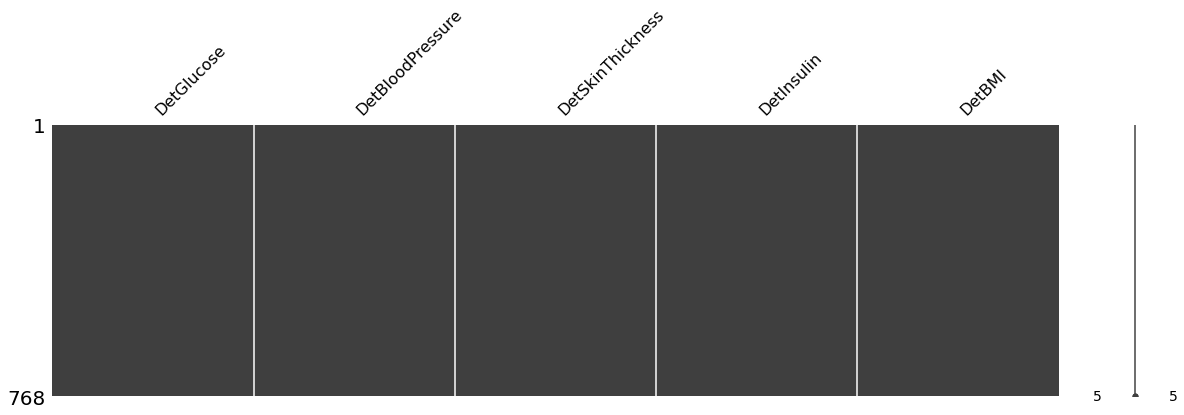

In [12]:
mno.matrix(deter_data, figsize = (20,5))

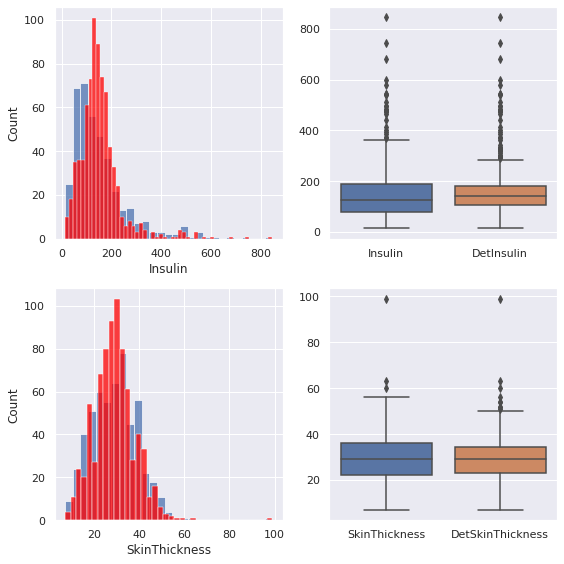

In [13]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.histplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.histplot(deter_data["Det" + variable], kde = False, ax = axes[index, 0], color = 'red')
    
    sns.boxplot(data = pd.concat([df[variable], deter_data["Det" + variable]], axis = 1),
                ax = axes[index, 1])
    
plt.tight_layout()

In [14]:
pd.concat([df[["Insulin", "SkinThickness"]], deter_data[["DetInsulin", "DetSkinThickness"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Insulin,394.0,155.548223,118.775855,14.0,76.2500,125.00000,190.000000,846.0
SkinThickness,541.0,29.153420,10.476982,7.0,22.0000,29.00000,36.000000,99.0
DetInsulin,768.0,154.805168,88.585687,14.0,106.8253,141.59457,180.017317,846.0
DetSkinThickness,768.0,29.043784,9.137562,7.0,23.0000,29.00000,34.158676,99.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model

%matplotlib inline

In [16]:
df = pd.read_csv("diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.0,50,1
1,1,85,66,29,0,26.6,351.0,31,0
2,8,183,64,0,0,23.3,672.0,32,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,347.079349,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,254.431659,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000,1.000000


In [19]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN
df.isnull().sum()[1:6]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

<AxesSubplot:>

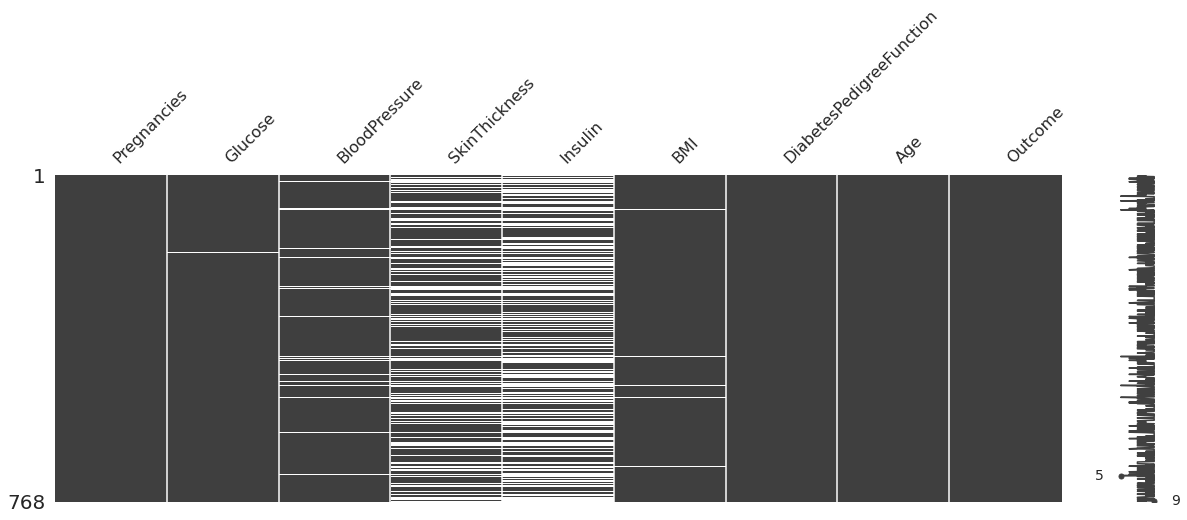

In [20]:
mno.matrix(df, figsize = (20, 6))

In [21]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [22]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [23]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [24]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:
        
    random_data["Ran" + feature] = df[feature + '_imp']
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()
    
    random_predict = np.random.normal(size = df[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) & 
                                                                            (random_predict > 0)]

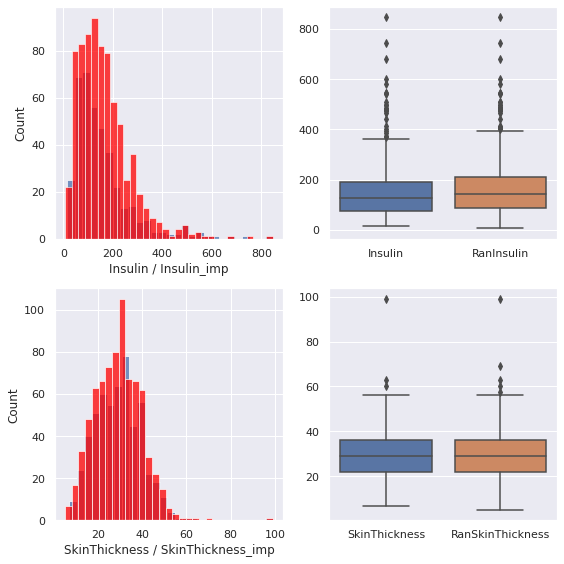

In [25]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.histplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.histplot(random_data["Ran" + variable], kde = False, ax = axes[index, 0], color = 'red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')
    
    sns.boxplot(data = pd.concat([df[variable], random_data["Ran" + variable]], axis = 1),
                ax = axes[index, 1])
    
    plt.tight_layout()

In [26]:
pd.concat([df[["Insulin", "SkinThickness"]], random_data[["RanInsulin", "RanSkinThickness"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Insulin,394.0,155.548223,118.775855,14.000000,76.25,125.000000,190.0,846.0
SkinThickness,541.0,29.153420,10.476982,7.000000,22.00,29.000000,36.0,99.0
RanInsulin,768.0,163.140836,106.308814,6.442699,87.00,142.740813,210.0,846.0
RanSkinThickness,768.0,29.183526,10.433548,5.171673,22.00,29.209852,36.0,99.0


In [27]:
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats.mstats import trima

a = np.array([10, 4, 9, 8, 5, 3, 7, 2, 1, 6])

In [28]:
wins = winsorize(a, limits=[0.1, 0.2])
wins

masked_array(data=[8, 4, 8, 8, 5, 3, 7, 2, 2, 6],
             mask=False,
       fill_value=999999)

In [29]:
trims = trima(a, limits=(2,8))
print(trims)

[-- 4 -- 8 5 3 7 2 -- 6]


# Mohon Maaf Pak karena untuk latihan binning nya saya bingung cari dataset nya dimana jadi, saya praktikannya sampai disini dulu.